In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [42]:
df=pd.read_csv('../MachineLearning/datasets/Fish.csv')

In [43]:
df

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [45]:
df.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


In [46]:
df.isna().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

In [47]:
X=df.drop(columns=['Weight','Species'],axis=1)
Y=df['Weight']

In [48]:
X

,Length1,Length2,Length3,Height,Width
0,23.2,25.4,30.0,11.5200,4.0200
1,24.0,26.3,31.2,12.4800,4.3056
2,23.9,26.5,31.1,12.3778,4.6961
3,26.3,29.0,33.5,12.7300,4.4555
4,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...
154,11.5,12.2,13.4,2.0904,1.3936
155,11.7,12.4,13.5,2.4300,1.2690
156,12.1,13.0,13.8,2.2770,1.2558
157,13.2,14.3,15.2,2.8728,2.0672


In [49]:
Y

0      242.0
1      290.0
2      340.0
3      363.0
4      430.0
       ...  
154     12.2
155     13.4
156     12.2
157     19.7
158     19.9
Name: Weight, Length: 159, dtype: float64

In [50]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=43)

In [51]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [58]:
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor(n_estimators=150,learning_rate=0.1,max_depth=3,random_state=42)

In [59]:
gbr.fit(X_train,Y_train)
y_pred=gbr.predict(X_test)

In [60]:
from sklearn.metrics import mean_squared_error,r2_score,accuracy_score
mean_squared_error(Y_test,y_pred)
r2_score(Y_test,y_pred)

0.8007416808461396

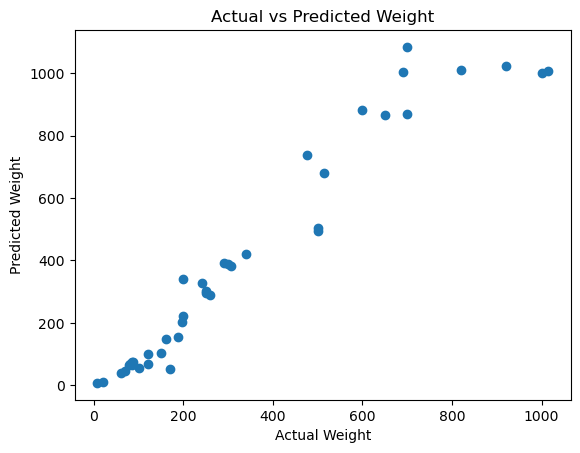

In [61]:
plt.scatter(Y_test, y_pred)
plt.xlabel("Actual Weight")
plt.ylabel("Predicted Weight")
plt.title("Actual vs Predicted Weight")
plt.show()